# **开源软件开发与社区治理 期中作业**

- **成员： 周逸平（51215903101） 刘新新（51215903085） 袁梦逸（51215903093）**
- **分析项目： yhatt/marp**
- **分析时间段： 2016年5月（项目创建）- 2019年9月（项目归档）**

---

### **1. 每月新增Star和Fork的个数**

┌─────────┬──────────────┬──────────────────┬──────────────────┐
│ (index) │     月份     │ 每月新增star个数 │ 每月新增fork个数 │
├─────────┼──────────────┼──────────────────┼──────────────────┤
│    0    │ '2016年5月'  │       '1'        │       '0'        │
│    1    │ '2016年6月'  │       '15'       │       '2'        │
│    2    │ '2016年7月'  │      '3630'      │      '132'       │
│    3    │ '2016年8月'  │      '445'       │       '32'       │
│    4    │ '2016年9月'  │      '265'       │       '19'       │
│    5    │ '2016年10月' │      '235'       │       '16'       │
│    6    │ '2016年11月' │      '462'       │       '30'       │
│    7    │ '2016年12月' │      '201'       │       '22'       │
│    8    │ '2017年1月'  │      '183'       │       '13'       │
│    9    │ '2017年2月'  │      '178'       │       '17'       │
│   10    │ '2017年3月'  │      '183'       │       '24'       │
│   11    │ '2017年4月'  │      '161'       │       '21'       │
│   12    │ '2017年5月'  │      '119'       │       '21'       │


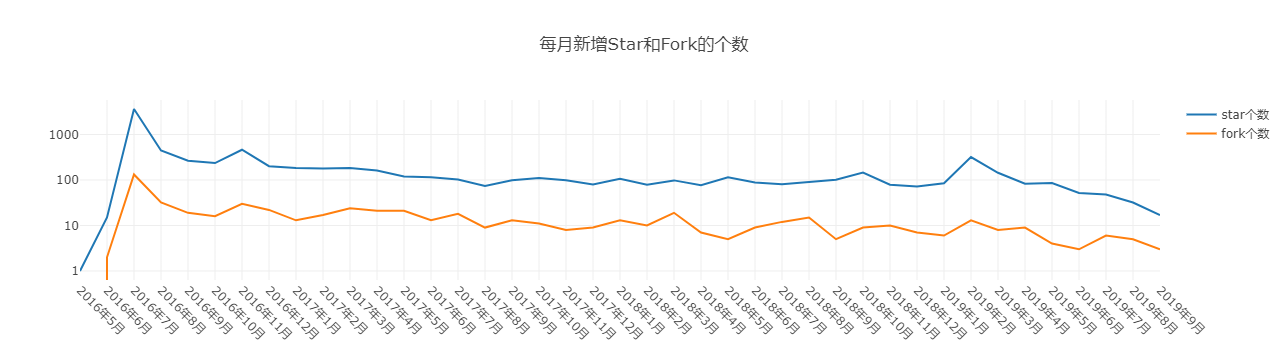

In [11]:
// 1、每月新增Star和Fork的个数
var openDigger = require('../src/open_digger');
var our_repo_id = 59939691;
var startYear = 2016, endYear = 2019;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

var times = Array();
for(let i = 0; i < years.length; i++) {
    if(i == 0) for (let j = 5; j <= 12; j++) times.push({'y': years[i], 'm': j});
    else if(i == years.length-1) for (let j = 1; j <= 9; j++) times.push({'y': years[i], 'm': j});
    else for (let j = 1; j <= 12; j++) times.push({'y': years[i], 'm': j});
}
times_axis = times.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(if(type='WatchEvent', 1, null)) as star,
    count(if(type='ForkEvent', 1, null)) as fork from github_log.year${time['y']} where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']}`); 
})).then(data => {
    var starCount = [], forkCount = [], tableData = [];
    data.forEach((d, i) => {
        starCount.push(d[0].star);
        forkCount.push(d[0].fork);
        tableData.push({'time': times_axis[i], 'star': starCount[starCount.length-1], 'fork': forkCount[forkCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月新增star个数': d.star,
            '每月新增fork个数': d.fork,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: starCount, mode: 'scatter', name: 'star个数'},
        {x: times_axis, y: forkCount, mode: 'scatter', name: 'fork个数'},
    ], {
        title: '每月新增Star和Fork的个数',
        xaxis: {type: 'category',tickangle: 45},
        yaxis: {type: 'log'}
    });
})

---

### **2. 每月打开Issue和关闭Issue的个数**

┌─────────┬──────────────┬───────────────────┬───────────────────┐
│ (index) │     月份     │ 每月打开Issue个数 │ 每月关闭Issue个数 │
├─────────┼──────────────┼───────────────────┼───────────────────┤
│    0    │ '2016年5月'  │        '0'        │        '0'        │
│    1    │ '2016年6月'  │        '3'        │        '0'        │
│    2    │ '2016年7月'  │       '46'        │       '17'        │
│    3    │ '2016年8月'  │       '15'        │        '3'        │
│    4    │ '2016年9月'  │        '4'        │        '0'        │
│    5    │ '2016年10月' │       '15'        │       '16'        │
│    6    │ '2016年11月' │       '18'        │        '6'        │
│    7    │ '2016年12月' │        '8'        │        '0'        │
│    8    │ '2017年1月'  │        '5'        │        '0'        │
│    9    │ '2017年2月'  │       '12'        │        '1'        │
│   10    │ '2017年3月'  │        '9'        │        '1'        │
│   11    │ '2017年4月'  │        '5'        │        '1'        │
│   12    │ '2017年5月'  │        '

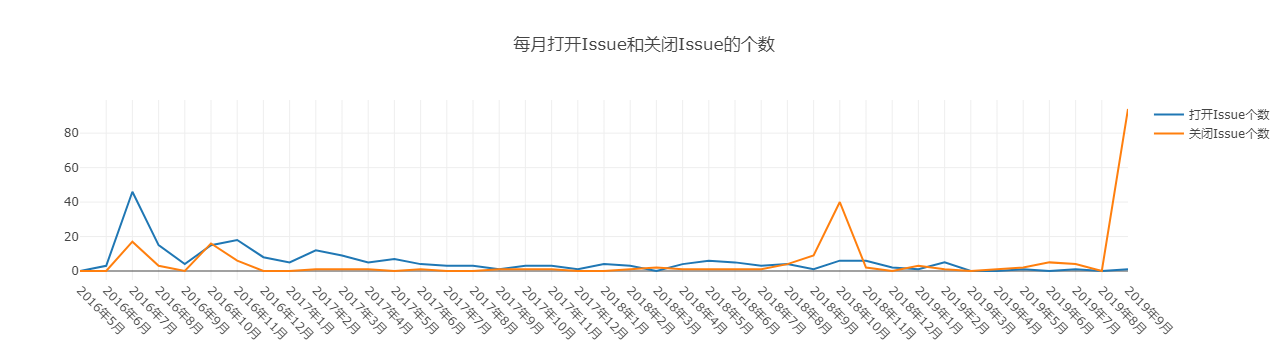

In [12]:
// 2、每月打开Issue和关闭Issue的个数
var openDigger = require('../src/open_digger');
var our_repo_id = 59939691;
var startYear = 2016, endYear = 2019;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

var times = Array();
for(let i = 0; i < years.length; i++) {
    if(i == 0) for (let j = 5; j <= 12; j++) times.push({'y': years[i], 'm': j});
    else if(i == years.length-1) for (let j = 1; j <= 9; j++) times.push({'y': years[i], 'm': j});
    else for (let j = 1; j <= 12; j++) times.push({'y': years[i], 'm': j});
}
times_axis = yms.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(if(action='opened', 1, NULL)) as open,
    count(if(action='closed', 1, null)) as close from github_log.year${time['y']} where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']} and type='IssuesEvent'`); 
})).then(data => {
    var openCount = [], closeCount = [], tableData = [];
    data.forEach((d, i) => {
        openCount.push(d[0].open);
        closeCount.push(d[0].close);
        tableData.push({'time': times_axis[i], 'open': openCount[openCount.length-1], 'close': closeCount[closeCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月打开Issue个数': d.open,
            '每月关闭Issue个数': d.close,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: openCount, mode: 'scatter', name: '打开Issue个数'},
        {x: times_axis, y: closeCount, mode: 'scatter', name: '关闭Issue个数'},
    ], {
        title: '每月打开Issue和关闭Issue的个数',
        xaxis: {type: 'category',tickangle: 45}
    });
})

---

### **3. 每月打开PR和合入PR的个数**

┌─────────┬──────────────┬────────────────┬────────────────┐
│ (index) │     月份     │ 每月打开PR个数 │ 每月合入PR个数 │
├─────────┼──────────────┼────────────────┼────────────────┤
│    0    │ '2016年5月'  │      '0'       │      '0'       │
│    1    │ '2016年6月'  │      '0'       │      '0'       │
│    2    │ '2016年7月'  │      '15'      │      '9'       │
│    3    │ '2016年8月'  │      '4'       │      '3'       │
│    4    │ '2016年9月'  │      '1'       │      '0'       │
│    5    │ '2016年10月' │      '8'       │      '9'       │
│    6    │ '2016年11月' │      '3'       │      '3'       │
│    7    │ '2016年12月' │      '1'       │      '0'       │
│    8    │ '2017年1月'  │      '0'       │      '0'       │
│    9    │ '2017年2月'  │      '2'       │      '0'       │
│   10    │ '2017年3月'  │      '1'       │      '0'       │
│   11    │ '2017年4月'  │      '0'       │      '0'       │
│   12    │ '2017年5月'  │      '0'       │      '0'       │
│   13    │ '2017年6月'  │      '1'       │      '4'       │
│   1

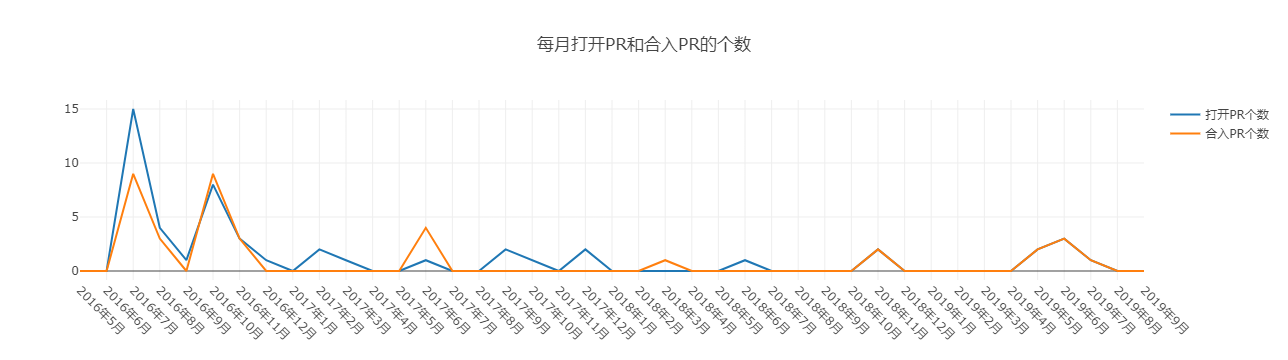

In [13]:
// 3、每月打开PR和合入PR的个数
var openDigger = require('../src/open_digger');
var our_repo_id = 59939691;
var startYear = 2016, endYear = 2019;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

var times = Array();
for(let i = 0; i < years.length; i++) {
    if(i == 0) for (let j = 5; j <= 12; j++) times.push({'y': years[i], 'm': j});
    else if(i == years.length-1) for (let j = 1; j <= 9; j++) times.push({'y': years[i], 'm': j});
    else for (let j = 1; j <= 12; j++) times.push({'y': years[i], 'm': j});
}
times_axis = yms.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(if(action='opened', 1, null)) as open,
    count(if(pull_merged=1, 1, null)) as merge from github_log.year${time['y']} where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']} and type='PullRequestEvent'`); 
})).then(data => {
    var openCount = [], mergeCount = [], tableData = [];
    data.forEach((d, i) => {
        openCount.push(d[0].open);
        mergeCount.push(d[0].merge);
        tableData.push({'time': times_axis[i], 'open': openCount[openCount.length-1], 'merge': mergeCount[mergeCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月打开PR个数': d.open,
            '每月合入PR个数': d.merge,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: openCount, mode: 'scatter', name: '打开PR个数'},
        {x: times_axis, y: mergeCount, mode: 'scatter', name: '合入PR个数'},
    ], {
        title: '每月打开PR和合入PR的个数',
        xaxis: {type: 'category',tickangle: 45}
    });
})

---

### **4. 每月在仓库中活跃（只要有日志产生就算）的不同开发者总数**

┌─────────┬──────────────┬──────────────────────────────────┐
│ (index) │     月份     │ 每月在仓库中活跃的不同开发者总数 │
├─────────┼──────────────┼──────────────────────────────────┤
│    0    │ '2016年5月'  │               '2'                │
│    1    │ '2016年6月'  │               '17'               │
│    2    │ '2016年7月'  │              '3709'              │
│    3    │ '2016年8月'  │              '481'               │
│    4    │ '2016年9月'  │              '290'               │
│    5    │ '2016年10月' │              '254'               │
│    6    │ '2016年11月' │              '490'               │
│    7    │ '2016年12月' │              '224'               │
│    8    │ '2017年1月'  │              '196'               │
│    9    │ '2017年2月'  │              '202'               │
│   10    │ '2017年3月'  │              '214'               │
│   11    │ '2017年4月'  │              '187'               │
│   12    │ '2017年5月'  │              '138'               │
│   13    │ '2017年6月'  │              '130'         

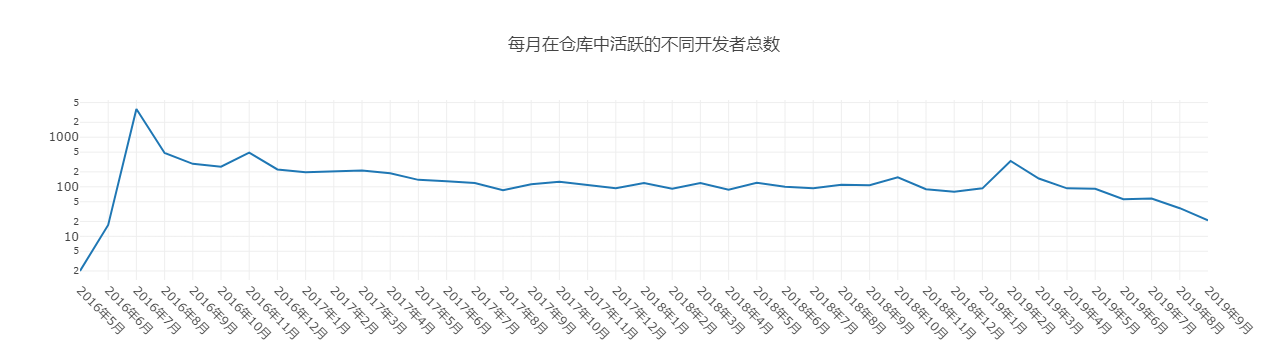

In [14]:
//4、每月在仓库中活跃（只要有日志产生就算）的不同开发者总数
var openDigger = require('../src/open_digger');
var our_repo_id = 59939691;
var startYear = 2016, endYear = 2019;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

var times = Array();
for(let i = 0; i < years.length; i++) {
    if(i == 0) for (let j = 5; j <= 12; j++) times.push({'y': years[i], 'm': j});
    else if(i == years.length-1) for (let j = 1; j <= 9; j++) times.push({'y': years[i], 'm': j});
    else for (let j = 1; j <= 12; j++) times.push({'y': years[i], 'm': j});
}
times_axis = yms.map(time => time['y'].toString() + '年' + time['m'].toString()+ '月');

Promise.all(times.map(time =>{
    return openDigger.driver.clickhouse.query(`select count(distinct actor_id) as user
    from github_log.year${time['y']} where repo_id=${our_repo_id} and toMonth(created_at)=${time['m']}`); 
})).then(data => {
    var userCount = [], tableData = [];
    data.forEach((d, i) => {
        userCount.push(d[0].user);
        tableData.push({'time': times_axis[i], 'user': userCount[userCount.length-1]});
    });
    console.table(tableData.map((d) => {
        return {
            '月份': d.time,
            '每月在仓库中活跃的不同开发者总数': d.user,
        };
    }));
    openDigger.render.plotly([
        {x: times_axis, y: userCount, mode: 'scatter', name: '活跃的不同开发者总数'},
    ], {
        title: '每月在仓库中活跃的不同开发者总数',
        xaxis: {type: 'category',tickangle: 45},
        yaxis: {type: 'log'}
    });
})

---

### **5. Issue从打开到关闭的平均时长和中位数（单位：天）**

In [5]:
//5、Issue从打开到关闭的平均时长和中位数（单位：天）
var openDigger = require('../src/open_digger');
var our_repo_id = 59939691;
var startYear = 2016, endYear = 2019;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

Promise.all(years.map(y =>{
    return openDigger.driver.clickhouse.query(`select datediff('second', issue_created_at, issue_closed_at)/(60*60*24) as duration
    from github_log.year${y} where repo_id=${our_repo_id} and type='IssuesEvent' and datediff('day', issue_created_at, issue_closed_at)>0`); 
})).then(data => {
    var durationData = [], ave_duration = 0;
    data.forEach((d, i) => {
        durationData.push(...d);
    });
    durationData.forEach((d, i) => {
        ave_duration += Number(d.duration);
    });
    ave_duration /= durationData.length;
    console.log('Issue从打开到关闭的平均时长（单位：天）：',ave_duration);
    function compare(property) {
        return function(a,b){
            var value1 = a[property];
            var value2 = b[property];
            return value1 - value2;
        }
    }
    durationData = durationData.sort(compare('duration'));
    var mid_site = durationData.length/2, mid_duration;
    if (durationData.length%2 == 0) mid_duration = durationData[mid_site].duration;
    else mid_duration = (durationData[Math.floor(mid_site)].duration + durationData[Math.ceil(mid_site)].duration)/2;
    console.log('Issue从打开到关闭的中位数时长（单位：天）：',mid_duration);
})

Issue从打开到关闭的平均时长（单位：天）： 557.3541503603356
Issue从打开到关闭的中位数时长（单位：天）： 560.4373784722222


---

### **6. PR从打开到合入的平均时长和中位数（单位：天）**

In [6]:
//6、PR从打开到合入的平均时长和中位数（单位：天）
var openDigger = require('../src/open_digger');
var our_repo_id = 59939691;
var startYear = 2016, endYear = 2019;
var years = Array.from({length: endYear - startYear + 1}, (_, i) => i + startYear);

Promise.all(years.map(y =>{
    return openDigger.driver.clickhouse.query(`select datediff('second', issue_created_at, pull_merged_at)/(60*60*24) as duration
    from github_log.year${y} where repo_id=${our_repo_id} and type='PullRequestEvent' and pull_merged = 1`); 
})).then(data => {
    var durationData = [], ave_duration = 0;
    data.forEach((d, i) => {
        durationData.push(...d);
    });
    durationData.forEach((d, i) => {
        ave_duration += Number(d.duration);
    });
    ave_duration /= durationData.length;
    console.log('PR从打开到合入的平均时长（单位：天）：',ave_duration);
    function compare(property) {
        return function(a,b){
            var value1 = a[property];
            var value2 = b[property];
            return value1 - value2;
        }
    }
    durationData = durationData.sort(compare('duration'));
    var mid_site = durationData.length/2, mid_duration;
    if (durationData.length%2 == 0) mid_duration = durationData[mid_site].duration;
    else mid_duration = (durationData[Math.floor(mid_site)].duration + durationData[Math.ceil(mid_site)].duration)/2;
    console.log('PR从打开到合入的中位数时长（单位：天）：',mid_duration);
})

PR从打开到合入的平均时长（单位：天）： 17.83884478228228
PR从打开到合入的中位数时长（单位：天）： 1.5970312500000001


---

### **7. Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）**

In [7]:
//7、Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
var openDigger = require('../src/open_digger');
var our_repo_id = 59939691;

openDigger.driver.clickhouse.query(`select datediff('second', min(issue_created_at), min(issue_comment_created_at))/(60*60*24) as duration
    from (select * from github_log.year2016 union all select * from github_log.year2017 union all select * from github_log.year2018 union all select * from github_log.year2019)
    where repo_id=${our_repo_id} and type='IssueCommentEvent' and issue_comment_author_id<>issue_author_id group by issue_id order by duration`
).then(data => {
    var ave_duration = 0;
    data.forEach((d, i) => {
        ave_duration += Number(d.duration);
    });
    ave_duration /= data.length;
    console.log('Issue和PR从打开到第一次有人回复（非本人回复）的平均时长（单位：天）：',ave_duration);
    var mid_site = data.length/2, mid_duration;
    if (data.length%2 == 0) mid_duration = data[mid_site].duration;
    else mid_duration = (data[Math.floor(mid_site)].duration + data[Math.ceil(mid_site)].duration)/2;
    console.log('Issue和PR从打开到第一次有人回复（非本人回复）的中位数时长（单位：天）：',mid_duration);
})

Issue和PR从打开到第一次有人回复（非本人回复）的平均时长（单位：天）： 83.82697800241071
Issue和PR从打开到第一次有人回复（非本人回复）的中位数时长（单位：天）： 4.354895833333334


---

### **8. 根据你观察到的仓库的历史数据，尝试找到几个你认为关键或值得注意的时间节点**

    1. 2016年5月：该项目被创建
    2. 2016年7月：该月在仓库中活跃的不同开发者总数达到项目历史上的最高峰，远高于其他月份；此外该月新增Star和Fork的个数、打开和合入PR的个数也是项目历史最高
    3. 2016年9月：在继2016年7月的开发者活跃盛世之后，出现的一个活跃度小低谷，打开和关闭Issue的个数、打开和合入PR的个数相比附近月份的数据要少许多
    4. 2018年10月：出现了一个关闭issue的小高峰，但合入PR的个数却为0
    5. 2019年2月：出现了一个在仓库中活跃的不同开发者总数的小高峰，同时也是新增Star和Fork的个数的小高峰
    6. 2019年9月：该项目被归档，大量issue被关闭
